In [1]:
from fastai.vision.all import * 

In [2]:
datapath = Path("plant-pathology-2021-fgvc8/")

In [3]:
datapath.ls()

(#4) [Path('plant-pathology-2021-fgvc8/train.csv'),Path('plant-pathology-2021-fgvc8/test_images'),Path('plant-pathology-2021-fgvc8/train_images'),Path('plant-pathology-2021-fgvc8/sample_submission.csv')]

In [4]:
train_df = pd.read_csv(datapath/'train.csv')

In [7]:
label_dist = train_df['labels'].value_counts()

### Image Res

In [65]:
def read_img_shape(im): return PILImage.create(datapath/f'train_images/{im}').shape

In [69]:
res = parallel(read_img_shape, train_df['image'].sample(1000), progress=True)

In [71]:
Counter(res)

Counter({(2672, 4000): 890,
         (3000, 4000): 38,
         (1728, 2592): 43,
         (3024, 4032): 10,
         (3456, 5184): 13,
         (3456, 4608): 5,
         (3024, 3024): 1})

### Intra-class

In [42]:
idxs = [train_df.query(f"labels == '{l}'").sample(1).index[0] for l in label_dist.index]

In [43]:
images = train_df.iloc[idxs]['image'].values
labels = train_df.iloc[idxs]['labels'].values

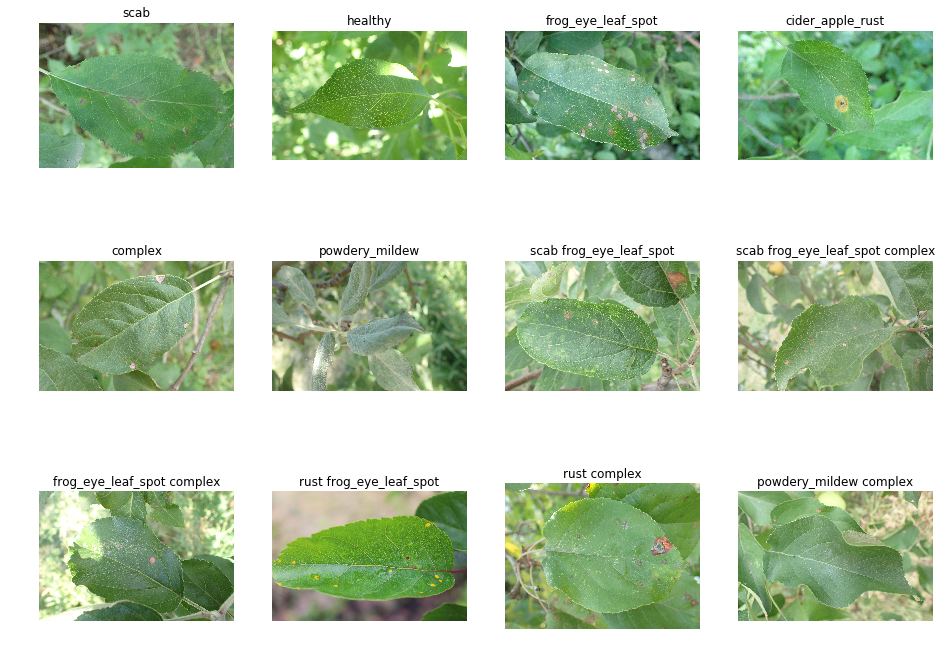

In [47]:
fig, axes = plt.subplots(3,4, figsize=(4*4,4*3))
axes = axes.flatten()
for ax, im, l in zip(axes, images, labels):
    img = PILImage.create(datapath/f'train_images/{im}')
    img.show(ax=ax, title=l)

### Inte-class

In [62]:
idxs = array([list(train_df.query(f"labels == '{l}'").sample(5).index) for l in label_dist.index[:]])

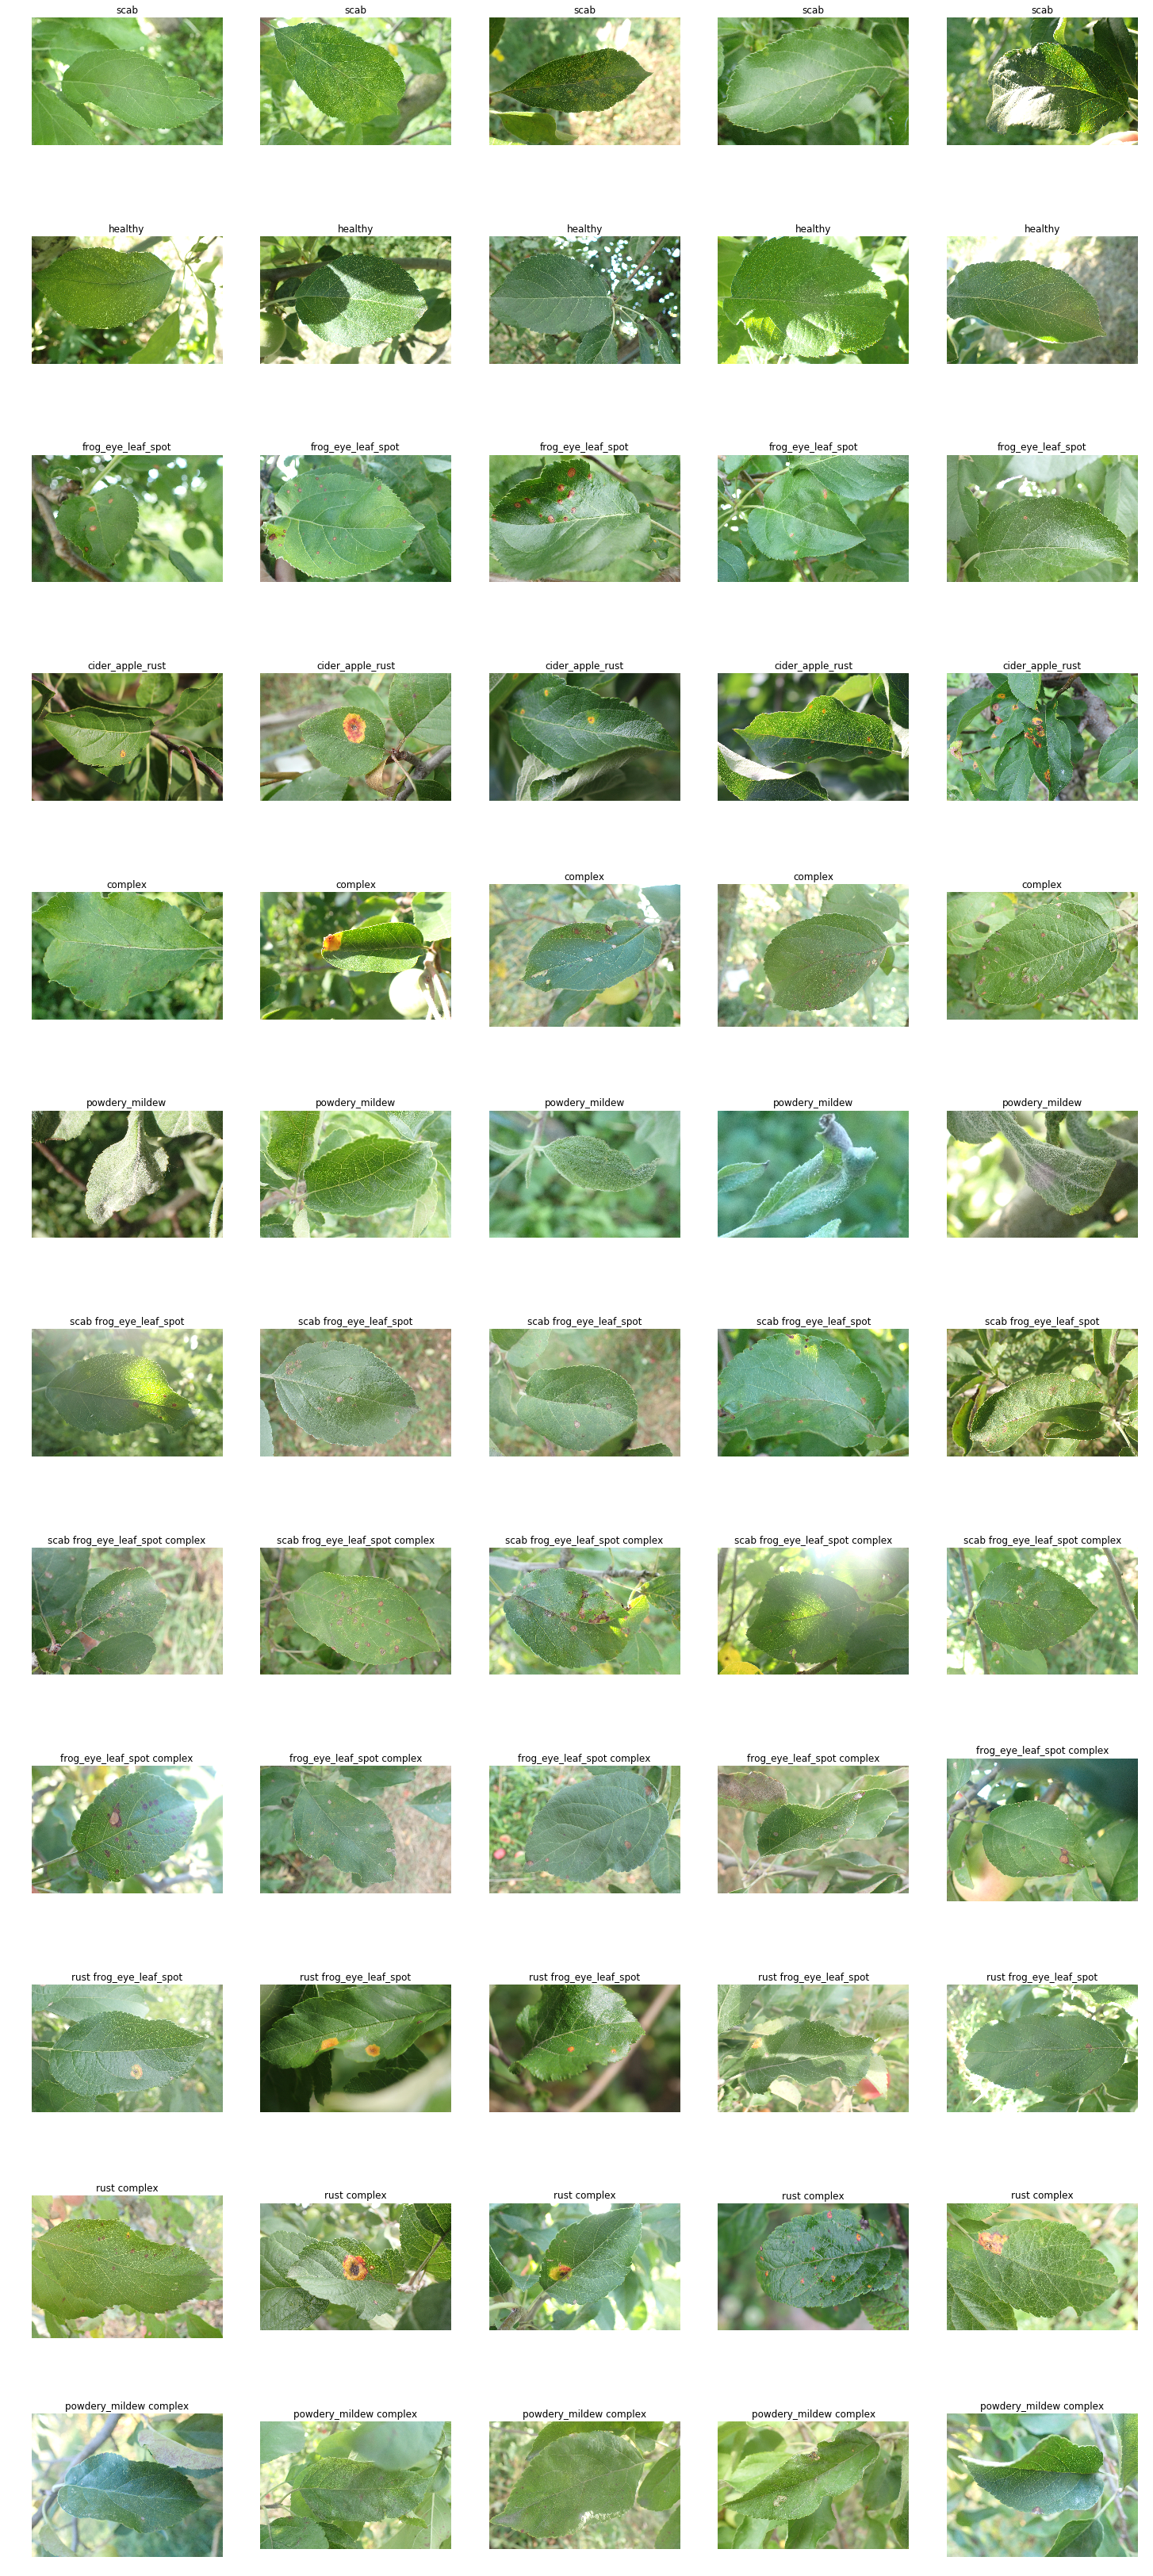

In [63]:
fig, axes = plt.subplots(*idxs.shape, figsize=array(idxs.shape)[::-1]*5)
for i, _idxs in enumerate(idxs):
    images = train_df.iloc[_idxs]['image'].values
    labels = train_df.iloc[_idxs]['labels'].values
    _axes = axes[i]
    for ax, im, l in zip(_axes, images, labels):
        img = PILImage.create(datapath/f'train_images/{im}')
        img.show(ax=ax, title=l)